In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from yellowbrick.model_selection import validation_curve 
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_csv("wineQuality_processed.csv")
data_temp=data
X=data.drop(['quality'],axis=1)
y=data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
X_train_33, X_test_33, y_train_33, y_test_33 = train_test_split(X, y, test_size=0.33, random_state=30)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.20, random_state=30)

In [3]:
#Function to get the test report for each model
def test_report(model,test_size):
    if test_size==0.25:
        prediction=model.predict(X_test)
        return(classification_report(y_test,prediction))
    if test_size==0.20:
        prediction=model.predict(X_test_20)
        return(classification_report(y_test_20,prediction))
    if test_size==0.33:
        prediction=model.predict(X_test_33)
        return(classification_report(y_test_33,prediction))
def train_report(model,test_size):
    if test_size==0.25:
        prediction=model.predict(X_train)
        return(classification_report(y_train,prediction))
    if test_size==0.20:
        prediction=model.predict(X_train_20)
        return(classification_report(y_train_20,prediction))
    if test_size==0.33:
        prediction=model.predict(X_train_33)
        return(classification_report(y_train_33,prediction))
#Function to get the f1-score,precision
def f_p_r(model,test_size,name):
    global reps
    if test_size==0.20:
        predicts_20=model.predict(X_test_20)
        reps=classification_report(y_test_20,predicts_20,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.20 for ",name," Recall:",recal)
        print("With test_size=0.20 for ",name," f1 score:",f1)
        print("With test_size=0.20 for ",name," precision:",precs)
    if test_size==0.25:
        predicts=model.predict(X_test)
        reps=classification_report(y_test,predicts,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.25 for ",name," Recall:",recal)
        print("With test_size=0.25 for ",name," f1 score:",f1)
        print("With test_size=0.25 for ",name," precision:",precs)
    if test_size==0.33:
        predicts_33=model.predict(X_test_33)
        reps=classification_report(y_test_33,predicts_33,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.33 for ",name," Recall:",recal)
        print("With test_size=0.33 for ",name," f1 score:",f1)
        print("With test_size=0.33 for ",name," precision:",precs)
#Function to get the confusion matrix
def confuse_mat(model,test_size):
    if test_size==0.20:
        prediction=model.predict(X_test_20)
        conmat=confusion_matrix(y_test_20,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
    if test_size==0.25:
        prediction=model.predict(X_test)
        conmat=confusion_matrix(y_test,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
    if test_size==0.33:
        prediction=model.predict(X_test_33)
        conmat=confusion_matrix(y_test_33,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
#Function to plot the R0C curve
def roc_auc(model,name,test_size):
    if test_size==0.20:
        ns_probs = [0 for _ in range(len(y_test_20))]
        prediction_probs_20=model.predict_proba(X_test_20)
        prediction_probs_20 = prediction_probs_20[:, 1]
        ns_auc = roc_auc_score(y_test_20, ns_probs)
        lr_auc=roc_auc_score(y_test_20,prediction_probs_20)
        ns_fpr, ns_tpr, _ = roc_curve(y_test_20, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test_20,prediction_probs_20)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))
    if test_size==0.25:
        ns_probs = [0 for _ in range(len(y_test))]
        prediction_probs=model.predict_proba(X_test)
        prediction_probs = prediction_probs[:, 1]
        ns_auc = roc_auc_score(y_test, ns_probs)
        lr_auc=roc_auc_score(y_test,prediction_probs)
        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test,prediction_probs)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))
    if test_size==0.33:
        ns_probs = [0 for _ in range(len(y_test_33))]
        prediction_probs_33=model.predict_proba(X_test_33)
        prediction_probs_33 = prediction_probs_33[:, 1]
        ns_auc = roc_auc_score(y_test_33, ns_probs)
        lr_auc=roc_auc_score(y_test_33,prediction_probs_33)
        ns_fpr, ns_tpr, _ = roc_curve(y_test_33, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test_33,prediction_probs_33)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))

In [4]:
#AdaBoost Algorithm
ada_model=AdaBoostClassifier()
base_estim=[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=3),ExtraTreeClassifier(max_depth=4)]
learn_rate=[0.1,0.2,0.3,0.5]
no_estimators=[100,125,500]
ada_algorithm=['SAMME','SAMME.R']
ada_grid=dict(base_estimator=base_estim,learning_rate=learn_rate,n_estimators=no_estimators,algorithm=ada_algorithm)
adaClf_20=GridSearchCV(ada_model,param_grid=ada_grid,cv=10)
adaClf_20.fit(X_train_20,y_train_20)
print("AdaBoost Model working with test size=0.20")
print("-------------------------------------------")
params_combine_ada_20=pd.concat([pd.DataFrame(adaClf_20.cv_results_["params"]),pd.DataFrame(adaClf_20.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_ada_20)
print("-------------------------------------------")
print("Best parameter setting with test size=0.20: ",adaClf_20.best_params_)
print("Best accuracy score with test size=0.20: ",adaClf_20.best_score_)
print("--------------------------------------------------------------------------------------")
adaClf_25=GridSearchCV(ada_model,param_grid=ada_grid,cv=10)
adaClf_25.fit(X_train,y_train)
print("AdaBoost Model working with test size=0.25:")
print("-------------------------------------------")
params_combine_ada_25=pd.concat([pd.DataFrame(adaClf_25.cv_results_["params"]),pd.DataFrame(adaClf_25.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_ada_25)
print("-------------------------------------------")
print("Best parameter setting with test size=0.25: ",adaClf_25.best_params_)
print("Best accuracy score with test size=0.25: ",adaClf_25.best_score_)
print("--------------------------------------------------------------------------------------")
adaClf_33=GridSearchCV(ada_model,param_grid=ada_grid,cv=10)
adaClf_33.fit(X_train_33,y_train_33)
print("AdaBoost Model working with test size=0.33")
print("-------------------------------------------")
params_combine_ada_33=pd.concat([pd.DataFrame(adaClf_33.cv_results_["params"]),pd.DataFrame(adaClf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_ada_33)
print("-------------------------------------------")
print("Best parameter setting with test size=0.33: ",adaClf_33.best_params_)
print("Best accuracy score with test size=0.33: ",adaClf_33.best_score_)
print("--------------------------------------------------------------------------------------")

AdaBoost Model working with test size=0.20
-------------------------------------------
   algorithm                       base_estimator  learning_rate  \
0      SAMME  DecisionTreeClassifier(max_depth=1)            0.1   
1      SAMME  DecisionTreeClassifier(max_depth=1)            0.1   
2      SAMME  DecisionTreeClassifier(max_depth=1)            0.1   
3      SAMME  DecisionTreeClassifier(max_depth=1)            0.2   
4      SAMME  DecisionTreeClassifier(max_depth=1)            0.2   
..       ...                                  ...            ...   
67   SAMME.R     ExtraTreeClassifier(max_depth=4)            0.3   
68   SAMME.R     ExtraTreeClassifier(max_depth=4)            0.3   
69   SAMME.R     ExtraTreeClassifier(max_depth=4)            0.5   
70   SAMME.R     ExtraTreeClassifier(max_depth=4)            0.5   
71   SAMME.R     ExtraTreeClassifier(max_depth=4)            0.5   

    n_estimators  Accuracy  
0            100  0.735617  
1            125  0.739658  
2        

Best AdaBoost Model working with test size=0.20
------------------------------------------------------------------
Confusion matrix for AdaBoost with the best parameter settings with test size=0.20


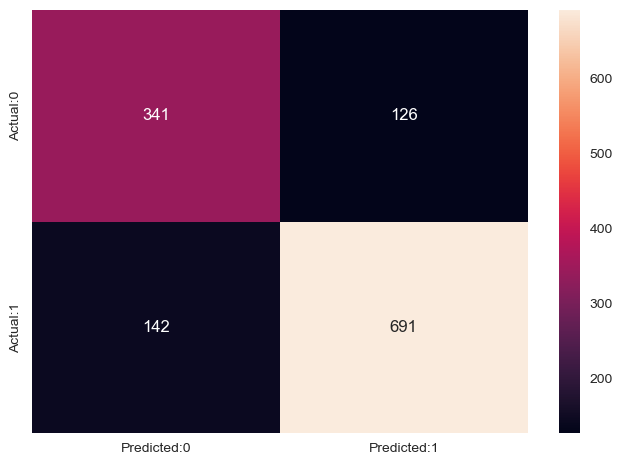

------------------------------------------------------------------
Classification Report for AdaBoost model with Test with test size=0.20
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       467
           1       0.85      0.83      0.84       833

    accuracy                           0.79      1300
   macro avg       0.78      0.78      0.78      1300
weighted avg       0.80      0.79      0.79      1300

------------------------------------------------------------------
Classification Report for AdaBoost model with Train with test size=0.20
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1917
           1       1.00      1.00      1.00      3280

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197

---------------------------------------------------------------------

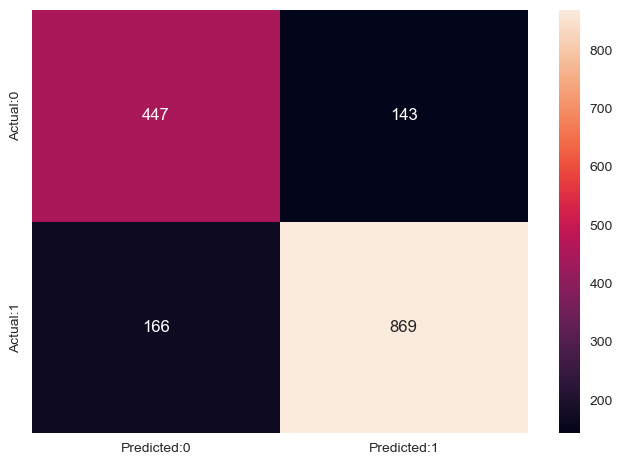

------------------------------------------------------------------
Classification Report for AdaBoost model with Test with test size=0.25
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       590
           1       0.86      0.84      0.85      1035

    accuracy                           0.81      1625
   macro avg       0.79      0.80      0.80      1625
weighted avg       0.81      0.81      0.81      1625

------------------------------------------------------------------
Classification Report for AdaBoost model with Train with test size=0.25
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1794
           1       0.98      0.99      0.99      3078

    accuracy                           0.98      4872
   macro avg       0.98      0.98      0.98      4872
weighted avg       0.98      0.98      0.98      4872

---------------------------------------------------------------------

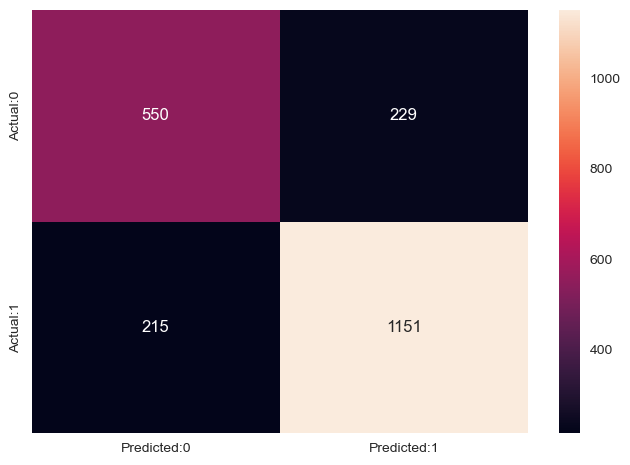

------------------------------------------------------------------
Classification Report for AdaBoost model with Test with test size=0.33
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       779
           1       0.83      0.84      0.84      1366

    accuracy                           0.79      2145
   macro avg       0.78      0.77      0.78      2145
weighted avg       0.79      0.79      0.79      2145

------------------------------------------------------------------
Classification Report for AdaBoost model with Train with test size=0.33
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1605
           1       1.00      1.00      1.00      2747

    accuracy                           1.00      4352
   macro avg       1.00      1.00      1.00      4352
weighted avg       1.00      1.00      1.00      4352

---------------------------------------------------------------------

In [5]:
#Implementing AdaBoost using Best Parameter Setting
best_ada_20=AdaBoostClassifier(algorithm='SAMME.R',base_estimator=DecisionTreeClassifier(max_depth=3),learning_rate=0.3,n_estimators=500)
ada_20=best_ada_20.fit(X_train_20,y_train_20)
print("Best AdaBoost Model working with test size=0.20")
print("------------------------------------------------------------------")
print("Confusion matrix for AdaBoost with the best parameter settings with test size=0.20")
confuse_mat(ada_20,0.20)
print("------------------------------------------------------------------")
print("Classification Report for AdaBoost model with Test with test size=0.20")
report=test_report(ada_20,0.20)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for AdaBoost model with Train with test size=0.20")
test_repo=train_report(ada_20,0.20)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_ada_25=AdaBoostClassifier(algorithm='SAMME.R',base_estimator=DecisionTreeClassifier(max_depth=3),learning_rate=0.2,n_estimators=500)
ada_25=best_ada_25.fit(X_train,y_train)
print("Best AdaBoost Model working with test size=0.25")
print("------------------------------------------------------------------")
print("Confusion matrix for AdaBoost with the best parameter settings with test size=0.25")
confuse_mat(ada_25,0.25)
print("------------------------------------------------------------------")
print("Classification Report for AdaBoost model with Test with test size=0.25")
report=test_report(ada_25,0.25)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for AdaBoost model with Train with test size=0.25")
test_repo=train_report(ada_25,0.25)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_ada_33=AdaBoostClassifier(algorithm='SAMME.R',base_estimator=DecisionTreeClassifier(max_depth=3),learning_rate=0.3,n_estimators=500)
ada_33=best_ada_33.fit(X_train_33,y_train_33)
print("Best AdaBoost Model working with test size=0.33")
print("------------------------------------------------------------------")
print("Confusion matrix for AdaBoost with the best parameter settings with test size=0.33")
confuse_mat(ada_33,0.33)
print("------------------------------------------------------------------")
print("Classification Report for AdaBoost model with Test with test size=0.33")
report=test_report(ada_33,0.33)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for AdaBoost model with Train with test size=0.33")
test_repo=train_report(ada_33,0.33)
print(test_repo)
print("--------------------------------------------------------------------------------------")


ROC curve and AUC score for test_size=0.20


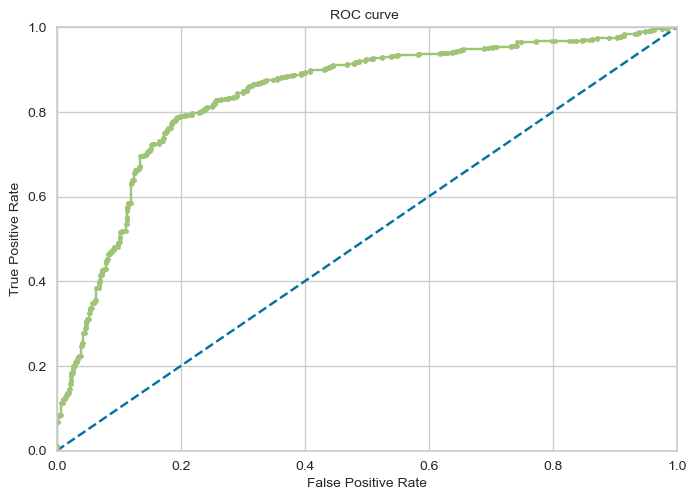

No Skill: ROC AUC=0.500
AdaBoost : ROC AUC=0.838
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.25


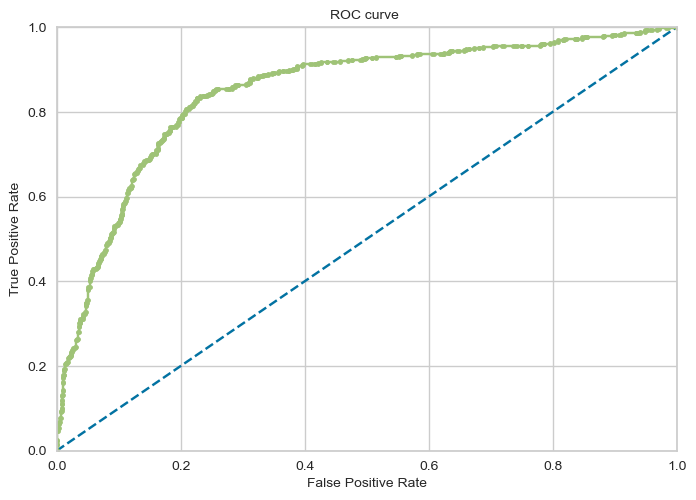

No Skill: ROC AUC=0.500
AdaBoost : ROC AUC=0.848
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.33


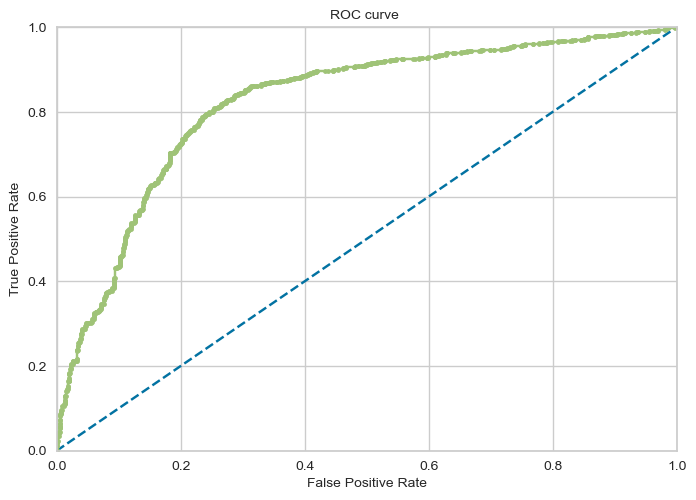

No Skill: ROC AUC=0.500
AdaBoost : ROC AUC=0.822


In [6]:
print("ROC curve and AUC score for test_size=0.20")
roc_auc(ada_20,"AdaBoost",0.20)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.25")
roc_auc(ada_25,"AdaBoost",0.25)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.33")
roc_auc(ada_33,"AdaBoost",0.33)

In [7]:
f_p_r(ada_25,0.25,"AdaBoost")

With test_size=0.25 for  AdaBoost  Recall: 0.7986203226070581
With test_size=0.25 for  AdaBoost  f1 score: 0.7960947655287771
With test_size=0.25 for  AdaBoost  precision: 0.7939481523512306
